In [3]:
# Preprocessing
import os
import seaborn as sns
from matplotlib.pyplot import imread
import matplotlib.pyplot as plt
import pandas as pd


<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


## Data Resoultion Analyser

In [126]:
dim1 = []
dim2 = []
for image_filename in os.listdir('./images'):
    name, ext = os.path.splitext(image_filename)
    try:
        if not ext == '.xml':
            img = imread('./images/'+image_filename)
            d1,d2,color = img.shape
            dim1.append(d1)
            dim2.append(d2)
    except: 
        print(image_filename)
        continue

test
train


In [127]:
print(dim1)
print(dim2)

[462, 761, 683, 1024, 768, 576, 708, 768, 683, 768, 322, 455, 683, 1024, 680, 768, 683, 683, 1024, 683, 683, 768, 768, 683, 768, 768, 623, 768, 768, 683, 1024, 768, 683, 689, 683, 577, 576, 945, 679, 626, 768, 617, 768, 842, 1024, 768, 1024, 768, 1000, 683, 768, 1024, 939, 768, 683, 645, 683, 768, 575, 768, 585, 685, 647, 768, 682, 768, 768, 1024, 669, 1024, 683, 768, 1024, 768, 768, 768, 1024, 1024, 768, 1024, 1024, 683, 891, 683, 731, 598, 1024, 1024, 843, 724, 1024, 768, 424, 768, 683, 1024, 1024, 692, 768, 768, 1024, 715, 683, 1024, 683, 1024, 683, 683, 768, 768, 768, 1024, 764, 642, 768, 888, 683, 1024, 1024, 682, 846, 1024, 713, 1024, 1024, 683, 750, 1024, 1024, 684, 768, 737, 1024, 709, 768, 768, 796, 768, 768, 895, 692, 768, 680, 683, 683, 683, 768, 1024, 683, 768, 768, 1024, 787, 1024, 1024, 683, 768, 768, 890, 1024, 435, 781, 768, 600, 700, 683, 1024, 766, 683, 768, 1024, 768, 768, 683, 1024, 795, 963, 768, 668, 578, 718, 1024, 598, 682, 784, 683, 768, 968, 683, 683, 731, 768

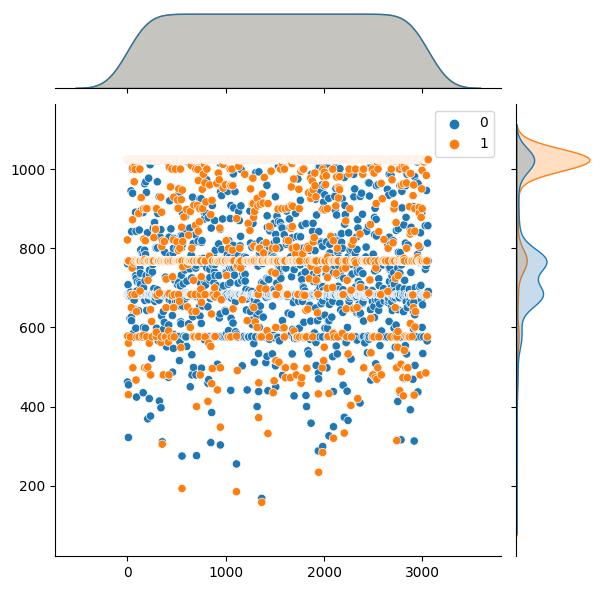

In [132]:
sns.jointplot([dim1,dim2])
plt.show()

From the plot above we can see that the image resolutions are very diverse so scaling all of these images to an average resolution of them all
would be a suitable choice to help the speed up the model and increase model performance.

In [133]:
import numpy as np

np.mean(dim1)

777.436131983012

In [134]:
print('Min:', np.min(dim1))
print('Max:', np.max(dim1))

Min: 168
Max: 1024


In [135]:
np.mean(dim2)

955.766089513231

In [136]:
print('Min:', np.min(dim2))
print('Max:', np.max(dim2))

Min: 158
Max: 1024


## Futher Preprocessing to discover further explainations to why the V1 model may or may not have low results 

### Ensure Training Data is balanced

In [113]:
train = pd.read_csv("./data/train_labels.csv")

In [73]:
train.head()

,filename,width,height,class,xmin,ymin,xmax,ymax
0,Pica_pica_506.jpg,981.0,693.0,Pica_pica,269.235540,297.324118,536.596762,396.432157
1,Periparus_ater_936.jpg,1024.0,683.0,Periparus_ater,398.421036,275.996882,793.675830,473.624279
2,Turdus_merula747.jpg,1024.0,683.0,Turdus_merula,113.337837,162.417918,841.378995,519.055864
3,Turdus_merula946.jpg,480.0,480.0,Turdus_merula,0.000000,136.117544,369.310399,435.823936
4,Pica_pica_197.jpg,1024.0,768.0,Pica_pica,515.831419,356.321987,795.525022,471.264564


In [74]:
pica = train[train["filename"].str.contains('Pica_pica')]
pica.shape

(745, 8)

In [75]:
periparus = train[train["filename"].str.contains('Periparus_ater')]
periparus.shape

(779, 8)

In [76]:
turdus = train[train["filename"].str.contains('Turdus_merula')]
turdus.shape

(563, 8)

In [77]:
erithacus = train[train["filename"].str.contains('ErithacusRubecula')]
erithacus.shape

(801, 8)

### Discover the class distribution

In [114]:
test = pd.read_csv("./data/test_labels.csv")
train = pd.read_csv("./data/train_labels.csv")

In [115]:
test["filename"] = test["filename"].str.replace("_\d.*", "")
test["filename"] = test["filename"].str.replace("\d.*", "")

train["filename"] = train["filename"].str.replace("_\d.*", "")
train["filename"] = train["filename"].str.replace("\d.*", "")

<ipython-input-115-b8dfa3f1d184>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  test["filename"] = test["filename"].str.replace("_\d.*", "")
<ipython-input-115-b8dfa3f1d184>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  test["filename"] = test["filename"].str.replace("\d.*", "")
<ipython-input-115-b8dfa3f1d184>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  train["filename"] = train["filename"].str.replace("_\d.*", "")
<ipython-input-115-b8dfa3f1d184>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  train["filename"] = train["filename"].str.replace("\d.*", "")


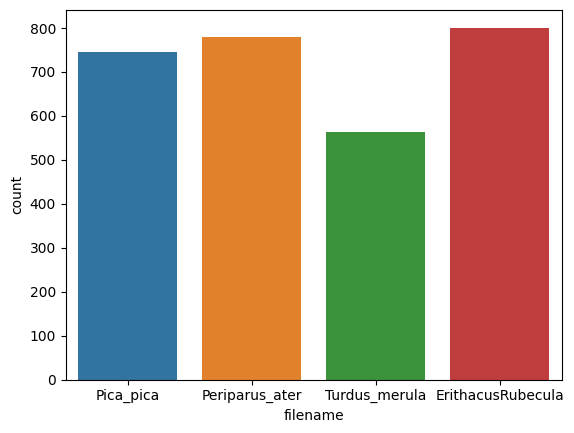

In [122]:
sns.countplot(train, x=train["filename"])
plt.show()

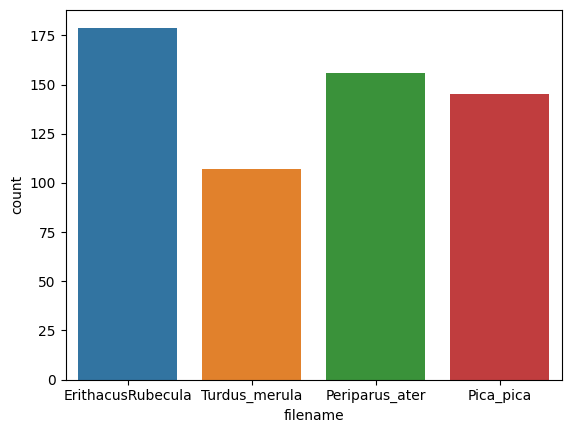

In [123]:
sns.countplot(test, x=test["filename"])
plt.show()

In [117]:
df = test.append(train)

In [86]:
df["filename"].shape

(3475,)

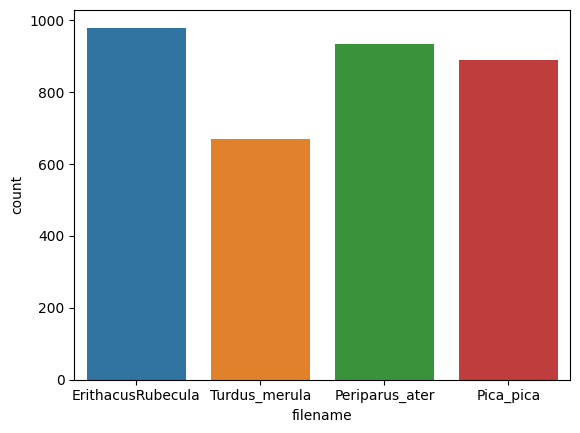

In [124]:
sns.countplot(df, x=df["filename"])
plt.show()

### There are less Turdus_merula bird images than the others. We can use augmentation to solve this problem

Post augmentation examples can be found in augmented.ipynb

# V2 Preprocessing

In [31]:
test = pd.read_csv("./data/test_labels_v2.csv")
train = pd.read_csv("./data/train_labels_v2.csv")

In [32]:
# Fix for displaying as augmented images were named differently compared to other images
test["filename"] = test["filename"].str.replace("^\d.+", "Turdus_merula")
train["filename"] = train["filename"].str.replace("^\d.+", "Turdus_merula")

<ipython-input-32-2dbd5b5ce337>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  test["filename"] = test["filename"].str.replace("^\d.+", "Turdus_merula")
<ipython-input-32-2dbd5b5ce337>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  train["filename"] = train["filename"].str.replace("^\d.+", "Turdus_merula")


In [33]:
test["filename"] = test["filename"].str.replace("_\d.*", "")
test["filename"] = test["filename"].str.replace("\d.*", "")

train["filename"] = train["filename"].str.replace("_\d.*", "")
train["filename"] = train["filename"].str.replace("\d.*", "")

<ipython-input-33-b8dfa3f1d184>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  test["filename"] = test["filename"].str.replace("_\d.*", "")
<ipython-input-33-b8dfa3f1d184>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  test["filename"] = test["filename"].str.replace("\d.*", "")
<ipython-input-33-b8dfa3f1d184>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  train["filename"] = train["filename"].str.replace("_\d.*", "")
<ipython-input-33-b8dfa3f1d184>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  train["filename"] = train["filename"].str.replace("\d.*", "")


['Pica_pica' 'Periparus_ater' 'Turdus_merula' 'ErithacusRubecula']


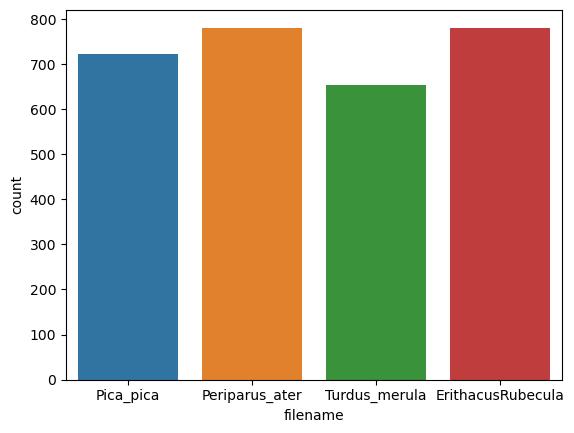

In [34]:
# Train Distribution
print(train["filename"].unique())
sns.countplot(train, x=train["filename"])
plt.show()

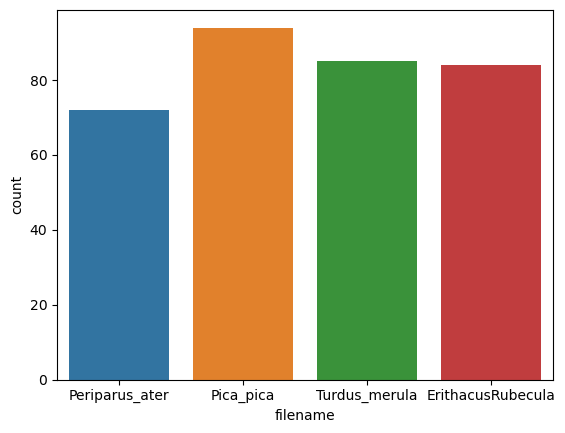

In [35]:
sns.countplot(test, x=test["filename"])
plt.show()

In [37]:
df = test.append(train)
df.shape

(3272, 8)

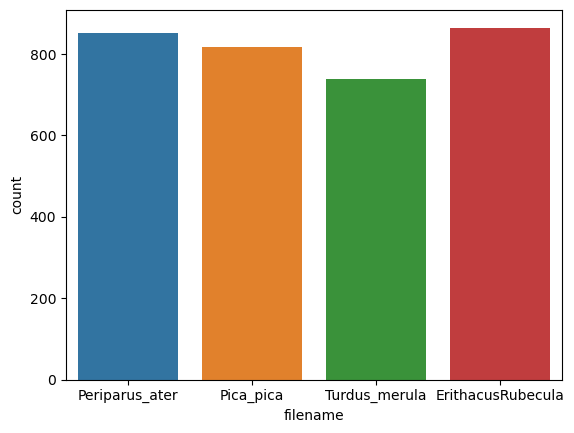

In [38]:
# All
sns.countplot(df, x=df["filename"])
plt.show()

Much better class balance as shown above